In [286]:
#package prince https://github.com/MaxHalford/prince
#MCA multiple correspondance analysis
#three or more categorical features

In [1]:
#Importing the necessary package
import math
import pandas as pd
import numpy as np
from prince import MCA#Dataset preparation with only numerical features
df = pd.read_csv('SurveyAnswers4ClusteringUpdated2023_apiguinumbers_flat5_mixedcategnumeric_diagramvariables.csv')
print(len(df))
print(len(df.columns))
df

11
10


,CDR_name,free_paid,api_gui_both,aql_sql_both_other,JsonXml_FlatStruct_both_none,FHIR_openEHRExtract_both_none,Forms,openEHR GDL,openEHR REST API,openEHR Demographics
0,ehrbase,free,api,aql,both,fhir,n,n,y,n
1,better,paid,both,aql,both,fhir,y,y,y,n
2,base24,paid,both,other,jsonxml,fhir,y,n,n,y
3,cabo,free,gui,other,jsonxml,fhir,n,n,n,n
4,arenaehr,paid,api,aql,both,fhir,y,y,y,n
5,eweave,paid,gui,both,none,none,y,n,n,y
6,ehrcare,paid,api,aql,both,none,y,n,n,y
7,clever,paid,both,sql,flatstruct,extract,y,y,n,n
8,ehrdb,paid,both,aql,both,extract,y,n,y,n
9,rhp,paid,both,sql,flatstruct,none,y,y,n,y


In [2]:
df=df.set_index('CDR_name')
df

,free_paid,api_gui_both,aql_sql_both_other,JsonXml_FlatStruct_both_none,FHIR_openEHRExtract_both_none,Forms,openEHR GDL,openEHR REST API,openEHR Demographics
CDR_name,,,,,,,,,
ehrbase,free,api,aql,both,fhir,n,n,y,n
better,paid,both,aql,both,fhir,y,y,y,n
base24,paid,both,other,jsonxml,fhir,y,n,n,y
cabo,free,gui,other,jsonxml,fhir,n,n,n,n
arenaehr,paid,api,aql,both,fhir,y,y,y,n
eweave,paid,gui,both,none,none,y,n,n,y
ehrcare,paid,api,aql,both,none,y,n,n,y
clever,paid,both,sql,flatstruct,extract,y,y,n,n
ehrdb,paid,both,aql,both,extract,y,n,y,n


In [3]:
mca = MCA(n_components = 2, n_iter = 3, random_state = 101)
mca.fit(df)
df_mca = mca.transform(df)
df_mca

,0,1
ehrbase,0.628957,-0.917486
better,-0.392563,-0.661731
base24,0.388522,0.435298
cabo,1.370367,0.138403
arenaehr,-0.235177,-0.762888
eweave,0.223511,1.250406
ehrcare,-0.143729,0.140027
clever,-0.926200,0.176870
ehrdb,-0.412399,-0.581180
rhp,-0.857878,0.687608


In [4]:
mca.explained_inertia_ #variance explained

[0.2506635443805253, 0.24568624097646857]

In [5]:
round(sum(mca.explained_inertia_)*100,1)

49.6

In [6]:
 mca.eigenvalues_

[0.4177725739675422, 0.4094770682941143]

In [7]:
mca.column_coordinates(df)

,0,1
free_paid_free,1.546618,-0.608750
free_paid_paid,-0.343693,0.135278
api_gui_both_api,0.234640,-0.564801
api_gui_both_both,-0.680902,0.017773
api_gui_both_gui,1.232977,1.085169
aql_sql_both_other_aql,-0.171705,-0.869898
aql_sql_both_other_both,0.448749,1.050999
aql_sql_both_other_other,1.360624,0.448271
aql_sql_both_other_sql,-1.380110,0.675475
JsonXml_FlatStruct_both_none_both,-0.171705,-0.869898


<AxesSubplot:title={'center':'Row and column principal coordinates'}, xlabel='Component 0 (25.07% inertia)', ylabel='Component 1 (24.57% inertia)'>

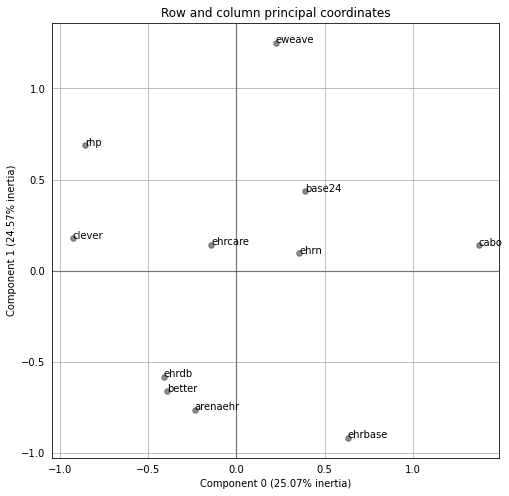

In [8]:
#The result is like the PCA or CA result, two principal components with SVD result as the values. Just like previous techniques, we could plot the coordinates into a two-dimension graph.
mca.column_coordinates(df)
mca.plot_coordinates(X =df,figsize=(8,8),show_row_points=True,show_row_labels=True, 
                     show_column_points=False, show_column_labels=False,
                    row_points_size=30, column_points_size=30)

In [9]:
mca = MCA(n_components = 3, n_iter = 3, random_state = 101)
mca.fit(df)
df_mca = mca.transform(df)
df_mca

,0,1,2
ehrbase,0.628957,-0.917486,0.266266
better,-0.392563,-0.661731,0.041546
base24,0.388522,0.435298,-0.609247
cabo,1.370367,0.138403,-0.692881
arenaehr,-0.235177,-0.762888,0.312903
eweave,0.223511,1.250406,0.923622
ehrcare,-0.143729,0.140027,0.626195
clever,-0.926200,0.176870,-0.738019
ehrdb,-0.412399,-0.581180,0.052053
rhp,-0.857878,0.687608,-0.325382


In [10]:
print(df_mca.iloc[0,2])
index=df_mca.index
print(index[0])

0.26626594721708613
ehrbase


In [11]:
mca.explained_inertia_ #variance explained

[0.2506635443805253, 0.24568624097646857, 0.16040091096271009]

In [12]:
round(sum(mca.explained_inertia_)*100,1)

65.7

In [13]:
 mca.eigenvalues_

[0.4177725739675422, 0.4094770682941143, 0.2673348516045168]

In [14]:
mca.column_coordinates(df)

,0,1,2
free_paid_free,1.546618,-0.608750,-0.412552
free_paid_paid,-0.343693,0.135278,0.091678
api_gui_both_api,0.234640,-0.564801,0.651931
api_gui_both_both,-0.680902,0.017773,-0.610798
api_gui_both_gui,1.232977,1.085169,0.223134
aql_sql_both_other_aql,-0.171705,-0.869898,0.502457
aql_sql_both_other_both,0.448749,1.050999,1.031407
aql_sql_both_other_other,1.360624,0.448271,-1.259204
aql_sql_both_other_sql,-1.380110,0.675475,-1.028346
JsonXml_FlatStruct_both_none_both,-0.171705,-0.869898,0.502457


<IPython.core.display.Javascript object>


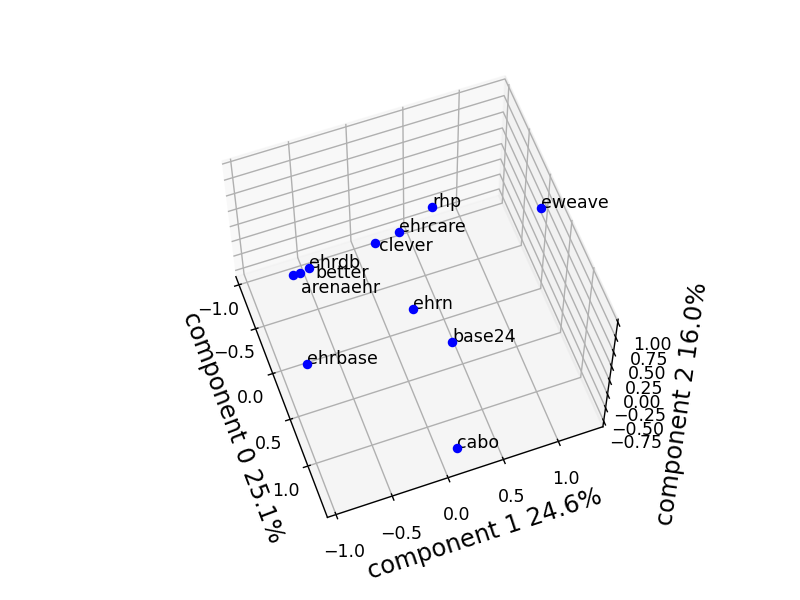

In [15]:
%matplotlib notebook
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D


from matplotlib import interactive,pyplot
from mpl_toolkits.mplot3d import Axes3D
from numpy.random import rand
from pylab import figure

 
m=rand(3,3) # m is an array of (x,y,z) coordinate triplets
 
fig = figure()
ax = fig.add_subplot(projection='3d')

for i in range(len(df_mca)): #plot each point + its index as text above
    if i==4:
        delta=0.2
        delta2=0.
    elif i==7:
        delta=0.1
        delta2=0.
    elif i==1:
        delta=0.1
        delta2=0.1
    else:
        delta=0.
        delta2=0
    ax.scatter(df_mca.iloc[i,0],df_mca.iloc[i,1],df_mca.iloc[i,2],color='b') 
    ax.text(df_mca.iloc[i,0]+delta,df_mca.iloc[i,1]+delta2,df_mca.iloc[i,2],  '%s' % (index[i]), size=10, zorder=1,  
    color='k') 

ax.set_xlabel(f'component 0 {round(mca.explained_inertia_[0]*100,1)}%', fontsize=14)
ax.set_ylabel(f'component 1 {round(mca.explained_inertia_[1]*100,1)}%', fontsize=14)
ax.set_zlabel(f'component 2 {round(mca.explained_inertia_[2]*100,1)}%', fontsize=14)


ax.view_init(60., -20.)

plt.show()
#plt.savefig('DimensionsReductionSurvey2023_orig-4diagram_1000dpi.pdf',dpi=1000,format='pdf')
#plt.savefig('DimensionsReductionSurvey2023_orig-4diagram_1000dpi.tiff',dpi=1000,format='tiff')





In [17]:
import plotly.express as px

import plotly.graph_objects as go
from plotly.validators.scatter.marker import SymbolValidator

raw_symbol = SymbolValidator().values

symbol_sequence=[raw_symbol[25*3],raw_symbol[27*3],raw_symbol[6*3],raw_symbol[5*3],raw_symbol[31*3],
                raw_symbol[0*3],raw_symbol[21*3],raw_symbol[9*3],raw_symbol[33*3],raw_symbol[11*3],
                raw_symbol[29*3]]


from sklearn.decomposition import PCA

labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(mca.explained_inertia_ * 100)
}

fig = px.scatter_matrix(
    df_mca,
    labels=labels,
    dimensions=range(3),
    symbol_sequence=symbol_sequence,
    color=df_mca.index,
    symbol=df_mca.index
)
fig.update_traces(diagonal_visible=False)
fig.show()
#fig.write_image('DimensionsReductionSurvey2023_orig-4diagram_2dplots_1000dpi.pdf',scale=2)
fig.write_image('DimensionsReductionSurvey2023_orig-4diagram_2dplots_1000dpi.jpeg',scale=8)